In [134]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Have a nicer style of the plots

In [135]:
df = pd.read_csv('mushroom.csv')

In [136]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


In [137]:
df.shape

(2438, 24)

In [138]:
pd.isnull(df).values.any()

False

In [139]:
df["habitat"]#.value_count()

0       d
1       d
2       m
3       d
4       m
       ..
2433    g
2434    l
2435    d
2436    d
2437    d
Name: habitat, Length: 2438, dtype: object

In [140]:
[df[x].unique().shape[0] for x in df.columns]

[5, 3, 10, 2, 9, 2, 2, 2, 12, 2, 5, 543, 4, 4, 8, 9, 1, 3, 71, 3, 5, 9, 6, 7]

In [141]:
Y = df['habitat']
X = df[df.columns[1:]]

In [142]:
Y

0       d
1       d
2       m
3       d
4       m
       ..
2433    g
2434    l
2435    d
2436    d
2437    d
Name: habitat, Length: 2438, dtype: object

In [143]:
X_dummy = pd.get_dummies(X)

In [144]:
Y_dummy = Y.apply(lambda x: 1 if x=='e' else 0)

In [145]:
df.bruises.unique()

array(['t', 'f'], dtype=object)

In [146]:
from sklearn import tree

In [147]:
def naive_split(X, Y, n):
    # Take first n lines of X and Y for training and the rest for testing
    X_train = X[:n]
    X_test  = X[n:]
    Y_train = Y[:n]
    Y_test  = Y[n:]
    return (X_train, X_test, Y_train, Y_test)

In [154]:
def train_model(n=7000):
    # Given X_dummy and Y_dummy, split naively into training and testing sets
    X_train, X_test, Y_train, Y_test = naive_split(X_dummy, Y_dummy, n)
    # Instantiate a default decision tree with fixed random state
    # NOTE: In real life you'd probably want to remove the fixed seed.
    clf = tree.DecisionTreeClassifier(random_state=42)
    # Next, train a default decision tree using the training sets
    clf = clf.fit(X_train, Y_train)
    # Lastly, return the test sets and the trained model
    return (X_test, Y_test, clf)

In [155]:
X_test, Y_test, clf = train_model()

In [156]:
clf.predict(X_test[0:1]).tolist()[0]

ValueError: Found array with 0 sample(s) (shape=(0, 110)) while a minimum of 1 is required.

In [151]:
Y_test[0:1].tolist()[0]

IndexError: list index out of range

In [152]:
import sklearn.metrics as metrics

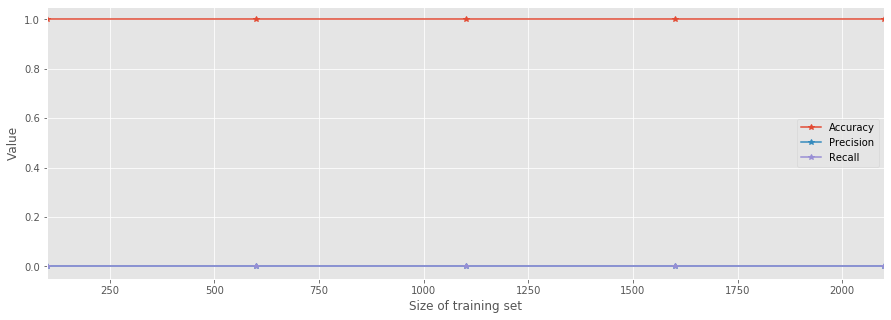

In [163]:
sizes = np.arange(100,len(Y_dummy), 500)
result = {}
for size in sizes:
    X_test, Y_test, clf = train_model(n=size)
    score     = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    result[size] = (score, precision, recall)
# Turn the results into a DataFrame
# Transposing is needed (you tryout without it)
result = pd.DataFrame(result).transpose()
result.columns = ['Accuracy', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.xlabel('Size of training set')
plt.ylabel('Value');

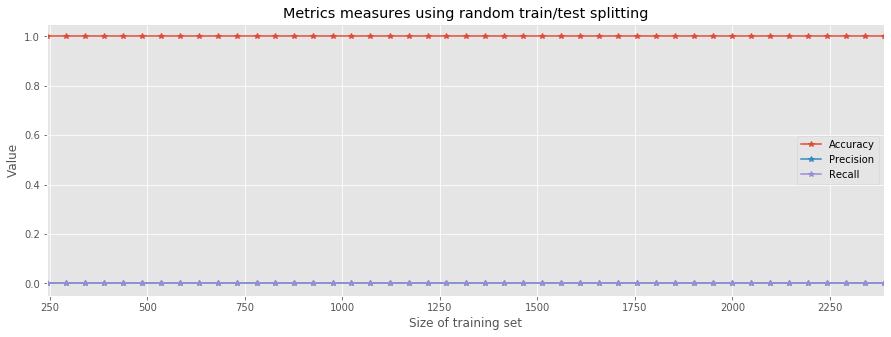

In [164]:
from sklearn import model_selection
sizes = np.arange(0.9,0.01, -0.02)
result = {}
for size in sizes:
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
        X_dummy, Y_dummy, test_size=size, random_state=42)
    clf = tree.DecisionTreeClassifier(random_state=42)
    clf = clf.fit(X_train, Y_train)
    score     = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    result[len(Y_train)] = (score, precision, recall)
# Turn the results into a DataFrame
# Transposing is needed (you can tryout without it)
result = pd.DataFrame(result).transpose()
result.columns = ['Accuracy', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.title('Metrics measures using random train/test splitting')
plt.xlabel('Size of training set')
plt.ylabel('Value');

In [165]:
# Counting e(i) and p(i), the number of edible and poisonous mushrums up to the i-th row
e = []
p = []
for i in range(10,len(Y)):
    tmp = Y[:i].value_counts()
    e.append(tmp['e'])
    p.append(tmp['p'])
type_count = pd.DataFrame({'edible':e, 'poisonous': p},index=range(10,len(Y_dummy)))
type_count.plot(figsize=(12,5))
plt.xlabel('Number of first rows');
plt.ylabel('Count');

KeyError: 'e'

In [166]:
X_train, X_test, Y_train, Y_test = naive_split(X_dummy, Y_dummy, 2800)

In [167]:
def test_tree(clf, X_train, X_test, Y_train, Y_test, print_res=True):
    clf       = clf.fit(X_train, Y_train)
    score     = clf.score(X_test, Y_test) # In the decision tree's classifier case it is the mean accuracy
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    res = (score, precision,recall)
    if print_res:
        print("Accuracy = %f / Precision = %f / Recall = %f" % res)
    return res

In [168]:
clf=tree.DecisionTreeClassifier(
    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=42, # we override the default here for the sake of reproducibility
    max_leaf_nodes=None, 
    min_impurity_split=1e-07, 
    habitat_weight=None, 
    presort=False)
test_tree(clf, X_train, X_test, Y_train, Y_test);

TypeError: __init__() got an unexpected keyword argument 'habitat_weight'

In [171]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
        X_dummy, Y_dummy, test_size=0.75, random_state=42)

In [172]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, Y_train)

In [173]:
test_tree(clf, X_train, X_test, Y_train, Y_test);

Accuracy = 1.000000 / Precision = 0.000000 / Recall = 0.000000
